## PART A: 2,3 - RMSProp and Adam

This notebook was primarily used for creating and testing of variations of Gradient Descent Learning Rule - RMSProp[1] and Adam[2].

As noted in previous experiments, large number of deep layers results in large disturbances in convergence.


[1] T. Tieleman and G. E. Hinton. Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent
magnitude. COURSERA: Neural Networks for Machine Learning, 4(2), 2012. URL https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf.

[2] Diederik P. Kingma and Jimmy Ba. Adam: A method for stochastic optimization. In ICML, 2015. URL
https://arxiv.org/abs/1412.6980.


### Setup

In [2]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function

In [5]:
from mlp.learning_rules import *
%aimport mlp.errors
%aimport mlp.learning_rules
%aimport mlp.layers

In [6]:
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


In [10]:
from mlp.layers import AffineLayer, ReluLayer, ELULayer
from mlp.errors import CrossEntropyLogSoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.01
num_epochs = 100 # TODO: CHANGED HERE FOR TESTING ONLY!
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 200

In [9]:
# Create a single function to test a simple MLP with RELULayer:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(model,
                               error,
                               learning_rule,
                               train_data,
                               valid_data,
                               test_data,
                               num_epochs,
                               stats_interval,
                               notebook=True):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors = {'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model,
        error,
        learning_rule,
        train_data,
        valid_data,
        test_data,
        data_monitors,
        notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(
        num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(
            np.arange(1, stats.shape[0]) * stats_interval,
            stats[1:, keys[k]],
            label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')

    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

### Baseline

Run an experiment using SGD learning rule for deep hidden layer (say 10)

#### RELULayer + SGD + 6 Layers (200)

In [12]:
expt = {} # store all the experiments
func = ReluLayer()
i = 5 # 10 layers

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=47)
) 6 layers


Epoch 1: 7.6s to complete
    error(train)=1.95e+00, acc(train)=4.62e-01, error(valid)=1.95e+00, acc(valid)=4.58e-01, error(test)=1.98e+00, acc(test)=4.54e-01
Epoch 2: 7.5s to complete
    error(train)=1.13e+00, acc(train)=6.66e-01, error(valid)=1.13e+00, acc(valid)=6.68e-01, error(test)=1.16e+00, acc(test)=6.57e-01
Epoch 3: 7.6s to complete
    error(train)=9.04e-01, acc(train)=7.28e-01, error(valid)=9.15e-01, acc(valid)=7.26e-01, error(test)=9.43e-01, acc(test)=7.15e-01
Epoch 4: 7.6s to complete
    error(train)=8.05e-01, acc(train)=7.52e-01, error(valid)=8.32e-01, acc(valid)=7.46e-01, error(test)=8.56e-01, acc(test)=7.38e-01
Epoch 5: 7.6s to complete
    error(train)=7.08e-01, acc(train)=7.78e-01, error(valid)=7.34e-01, acc(valid)=7.71e-01, error(test)=7.59e-01, acc(test)=7.62e-01
Epoch 6: 8.0s to complete
    error(train)=6.61e-01, acc(train)=7.92e-01, error(valid)=7.01e-01, acc(valid)=7.81e-01, error(test)=7.35e-01, acc(test)=7.72e-01
Epoch 7: 7.6s to complete
    error(train)=6.3

Epoch 53: 7.7s to complete
    error(train)=2.38e-01, acc(train)=9.05e-01, error(valid)=6.10e-01, acc(valid)=8.21e-01, error(test)=6.64e-01, acc(test)=8.14e-01
Epoch 54: 7.6s to complete
    error(train)=2.24e-01, acc(train)=9.13e-01, error(valid)=5.95e-01, acc(valid)=8.28e-01, error(test)=6.44e-01, acc(test)=8.18e-01
Epoch 55: 7.7s to complete
    error(train)=2.08e-01, acc(train)=9.20e-01, error(valid)=5.88e-01, acc(valid)=8.33e-01, error(test)=6.38e-01, acc(test)=8.24e-01
Epoch 56: 7.6s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=5.92e-01, acc(valid)=8.28e-01, error(test)=6.52e-01, acc(test)=8.17e-01
Epoch 57: 7.6s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=6.11e-01, acc(valid)=8.27e-01, error(test)=6.60e-01, acc(test)=8.16e-01
Epoch 58: 7.6s to complete
    error(train)=1.94e-01, acc(train)=9.25e-01, error(valid)=6.06e-01, acc(valid)=8.33e-01, error(test)=6.56e-01, acc(test)=8.23e-01
Epoch 59: 7.6s to complete
    error(tra

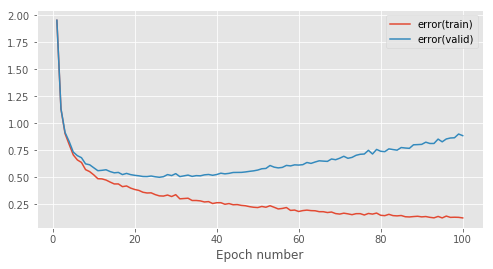

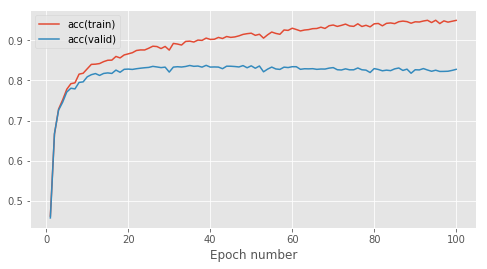

In [13]:
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    func,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

expt['SGD'] = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)

#### RELULayer + Momentum SGD + 6 Layer (200)

Repeat the experiment with momentum SGD:

In [14]:
from mlp.learning_rules import MomentumLearningRule

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=47)
) 6 layers


Epoch 1: 8.3s to complete
    error(train)=1.81e+00, acc(train)=4.91e-01, error(valid)=1.82e+00, acc(valid)=4.88e-01, error(test)=1.83e+00, acc(test)=4.83e-01
Epoch 2: 8.6s to complete
    error(train)=1.11e+00, acc(train)=6.74e-01, error(valid)=1.12e+00, acc(valid)=6.67e-01, error(test)=1.14e+00, acc(test)=6.61e-01
Epoch 3: 8.3s to complete
    error(train)=8.91e-01, acc(train)=7.32e-01, error(valid)=9.16e-01, acc(valid)=7.21e-01, error(test)=9.36e-01, acc(test)=7.17e-01
Epoch 4: 8.6s to complete
    error(train)=7.66e-01, acc(train)=7.66e-01, error(valid)=7.91e-01, acc(valid)=7.59e-01, error(test)=8.24e-01, acc(test)=7.46e-01
Epoch 5: 10.5s to complete
    error(train)=6.91e-01, acc(train)=7.85e-01, error(valid)=7.23e-01, acc(valid)=7.75e-01, error(test)=7.62e-01, acc(test)=7.63e-01
Epoch 6: 14.2s to complete
    error(train)=6.32e-01, acc(train)=8.00e-01, error(valid)=6.71e-01, acc(valid)=7.89e-01, error(test)=7.07e-01, acc(test)=7.75e-01
Epoch 7: 14.0s to complete
    error(train)=

Epoch 52: 12.1s to complete
    error(train)=2.22e-01, acc(train)=9.16e-01, error(valid)=5.88e-01, acc(valid)=8.29e-01, error(test)=6.43e-01, acc(test)=8.17e-01
Epoch 53: 8.4s to complete
    error(train)=2.18e-01, acc(train)=9.17e-01, error(valid)=5.89e-01, acc(valid)=8.30e-01, error(test)=6.51e-01, acc(test)=8.19e-01
Epoch 54: 8.4s to complete
    error(train)=2.00e-01, acc(train)=9.24e-01, error(valid)=5.88e-01, acc(valid)=8.32e-01, error(test)=6.38e-01, acc(test)=8.24e-01
Epoch 55: 8.4s to complete
    error(train)=2.02e-01, acc(train)=9.22e-01, error(valid)=5.95e-01, acc(valid)=8.31e-01, error(test)=6.52e-01, acc(test)=8.22e-01
Epoch 56: 8.4s to complete
    error(train)=2.02e-01, acc(train)=9.23e-01, error(valid)=6.04e-01, acc(valid)=8.34e-01, error(test)=6.69e-01, acc(test)=8.20e-01
Epoch 57: 8.4s to complete
    error(train)=2.03e-01, acc(train)=9.22e-01, error(valid)=6.12e-01, acc(valid)=8.26e-01, error(test)=6.70e-01, acc(test)=8.18e-01
Epoch 58: 8.4s to complete
    error(tr

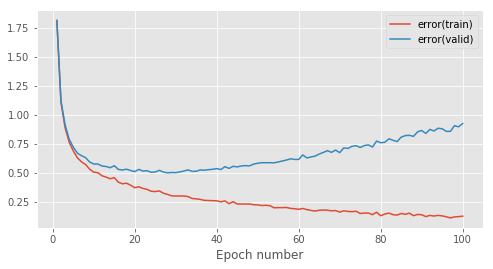

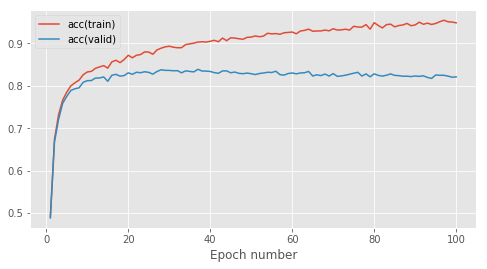

In [15]:
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    func,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = MomentumLearningRule(learning_rate=1e-3, mom_coeff=0.9) # use default params

expt['MSGD'] = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)

### RMSProp

In [23]:
from mlp.learning_rules import RMSPropLearningRule

In [24]:
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init)
]
output_layer = [
    func,
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func,
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i +
                           output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = RMSPropLearningRule(learning_rate=1e-3, beta=0.9, epsilon=1e-8)

expt['RMSProp'] = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=47)
) 6 layers


Epoch 1: 15.0s to complete
    error(train)=6.92e-01, acc(train)=7.74e-01, error(valid)=7.32e-01, acc(valid)=7.62e-01, error(test)=7.72e-01, acc(test)=7.55e-01
Epoch 2: 15.0s to complete
    error(train)=5.99e-01, acc(train)=8.04e-01, error(valid)=6.73e-01, acc(valid)=7.89e-01, error(test)=7.15e-01, acc(test)=7.78e-01
Epoch 3: 15.1s to complete
    error(train)=5.36e-01, acc(train)=8.20e-01, error(valid)=6.30e-01, acc(valid)=7.99e-01, error(test)=6.61e-01, acc(test)=7.91e-01
Epoch 4: 15.0s to complete
    error(train)=4.95e-01, acc(train)=8.32e-01, error(valid)=5.99e-01, acc(valid)=8.08e-01, error(test)=6.34e-01, acc(test)=8.02e-01
Epoch 5: 14.9s to complete
    error(train)=5.46e-01, acc(train)=8.22e-01, error(valid)=6.81e-01, acc(valid)=7.98e-01, error(test)=7.05e-01, acc(test)=7.92e-01
Epoch 6: 14.9s to complete
    error(train)=5.36e-01, acc(train)=8.22e-01, error(valid)=6.60e-01, acc(valid)=8.02e-01, error(test)=6.99e-01, acc(test)=7.91e-01
Epoch 7: 14.8s to complete
    error(tra

limit_output extension: Maximum message size of 5000 exceeded with 5100 characters

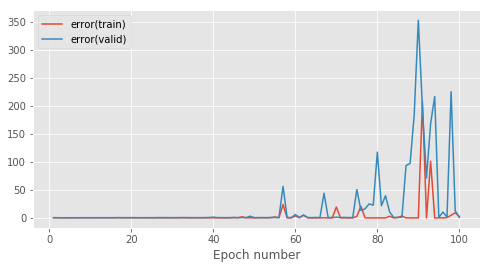

In [39]:
fig = expt['RMSProp'][-4]
fig

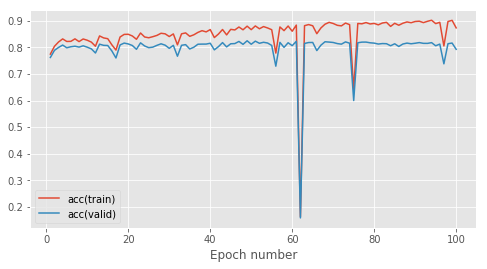

In [37]:
fig = expt['RMSProp'][-2]
fig

### Adam

In [18]:
from mlp.learning_rules import AdamLearningRule

MultiLayerModel(
    AffineLayer(input_dim=784, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=200)
    ReluLayer
    AffineLayer(input_dim=200, output_dim=47)
) 6 layers


Epoch 1: 11.6s to complete
    error(train)=6.92e-01, acc(train)=7.71e-01, error(valid)=7.28e-01, acc(valid)=7.58e-01, error(test)=7.57e-01, acc(test)=7.50e-01
Epoch 2: 11.6s to complete
    error(train)=5.63e-01, acc(train)=8.11e-01, error(valid)=6.30e-01, acc(valid)=7.97e-01, error(test)=6.53e-01, acc(test)=7.86e-01
Epoch 3: 12.0s to complete
    error(train)=5.03e-01, acc(train)=8.29e-01, error(valid)=5.91e-01, acc(valid)=8.10e-01, error(test)=6.26e-01, acc(test)=7.97e-01
Epoch 4: 11.5s to complete
    error(train)=4.68e-01, acc(train)=8.39e-01, error(valid)=5.64e-01, acc(valid)=8.15e-01, error(test)=5.98e-01, acc(test)=8.03e-01
Epoch 5: 11.6s to complete
    error(train)=4.48e-01, acc(train)=8.42e-01, error(valid)=5.64e-01, acc(valid)=8.13e-01, error(test)=6.04e-01, acc(test)=7.98e-01
Epoch 6: 11.6s to complete
    error(train)=4.27e-01, acc(train)=8.51e-01, error(valid)=5.61e-01, acc(valid)=8.20e-01, error(test)=5.92e-01, acc(test)=8.10e-01
Epoch 7: 11.7s to complete
    error(tra

Epoch 52: 11.8s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=6.76e-01, acc(valid)=8.24e-01, error(test)=7.09e-01, acc(test)=8.17e-01
Epoch 53: 12.5s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=6.70e-01, acc(valid)=8.21e-01, error(test)=6.83e-01, acc(test)=8.15e-01
Epoch 54: 11.7s to complete
    error(train)=2.96e-01, acc(train)=8.90e-01, error(valid)=6.41e-01, acc(valid)=8.33e-01, error(test)=6.96e-01, acc(test)=8.20e-01
Epoch 55: 11.8s to complete
    error(train)=3.24e-01, acc(train)=8.84e-01, error(valid)=7.08e-01, acc(valid)=8.21e-01, error(test)=7.29e-01, acc(test)=8.16e-01
Epoch 56: 11.8s to complete
    error(train)=3.04e-01, acc(train)=8.86e-01, error(valid)=6.47e-01, acc(valid)=8.27e-01, error(test)=6.94e-01, acc(test)=8.15e-01
Epoch 57: 11.8s to complete
    error(train)=3.07e-01, acc(train)=8.86e-01, error(valid)=6.52e-01, acc(valid)=8.22e-01, error(test)=6.85e-01, acc(test)=8.14e-01
Epoch 58: 11.8s to complete
    er

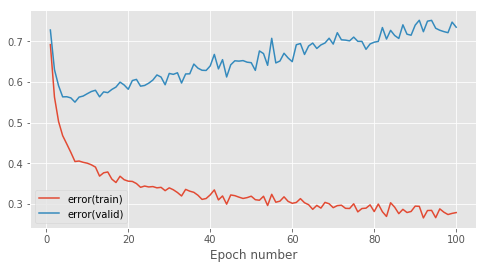

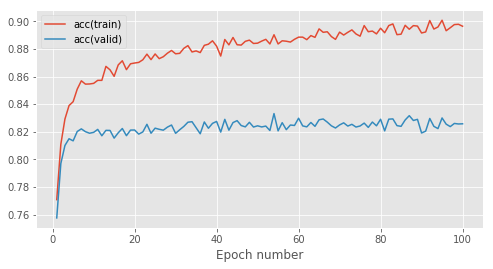

In [20]:
train_data.reset()
test_data.reset()
valid_data.reset()

# Initialise the weights and biases:
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

input_layer = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init)]
output_layer = [
    func, AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
]
each_hidden_layer = [
    func, AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init)
]

# create the MLP:
model = MultipleLayerModel(input_layer + each_hidden_layer * i + output_layer)
print(model, '{} layers'.format(i + 1))

error = CrossEntropyLogSoftmaxError()
learning_rule = AdamLearningRule(
    learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

expt['adam'] = train_model_and_plot_stats(
    model,
    error,
    learning_rule,
    train_data,
    valid_data,
    test_data,
    num_epochs,
    stats_interval,
    notebook=False)